# POSTTEST 8
## Kecerdasan Buatan
ALFI NOR IHSAN

2109106018

A1-21

Dataset yang digunakan : [Smallnorb](https://www.tensorflow.org/datasets/catalog/smallnorb)

**Buatlah model deep learning dengan ketentuan sebagai berikut:**

**Instruksi:**
- Dataset tidak boleh sama antar praktikan
- Minimal akurasi training 70% dan validation 70%
- Gunakan sequential model
- Buat model deep learning sederhana
- Rekomendasi: Gunakan dataset yang sudah bersih seperti dari library sklearn, tensorflow, MNIST, atau dari library lainnya


## Import Library yang akan digunakan

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



## Proses Klasifikasi data yang ada pada dataset smallnorb

In [2]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.load("smallnorb",
    split=["train[:70%]", "train[:30%]"], batch_size=-1, as_supervised=True)

## Proses encoding label dari dataset terhadap gambar yang ada di dataset

In [3]:
num_class = 5
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test  = tf.keras.utils.to_categorical(y_test_raw, num_class)


## Melihat gambar yang ada pada dataset

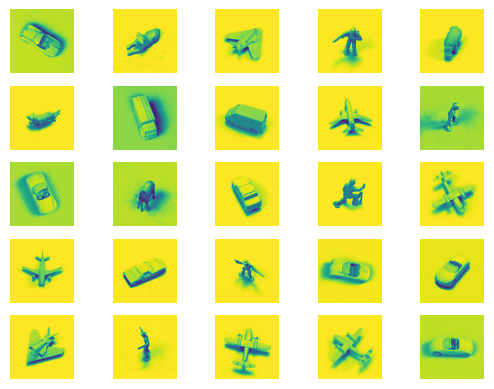

In [4]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

## Melihat ukuran variabel x_train_raw dan x_test_raw

In [5]:
x_train_raw.shape

TensorShape([17010, 96, 96, 1])

In [6]:
x_test_raw.shape

TensorShape([7290, 96, 96, 1])

## Proses konversi gambar pada data testing dan training

In [7]:
training = tf.image.resize(x_train_raw, (96,96))
testing = tf.image.resize(x_test_raw, (96,96))

In [8]:
training = np.reshape(training.numpy(),(17010,  9216))
testing = np.reshape(testing.numpy(), (7290,  9216))

## Proses normalisasi gambar pada data training dan testing

In [9]:
training = training.astype('float32')/255
testing = testing.astype('float32')/255

## Pembuatan model deep learning

In [10]:
model = Sequential([
        Dense(512, activation='relu', input_dim = (9216)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(5, activation='softmax')
        ])

### Hasil akhir dari model yang di buat

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4719104   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 4,883,973
Trainable params: 4,883,973
Non-trainable params: 0
_________________________________________________________________


## Proses compile data dengan menggunakan loss 'categorical_crossentropy'

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Proses training model

In [13]:
train = model.fit(training, y_train, batch_size=32, epochs=10, validation_data=(testing, y_test))

Epoch 1/10
532/532 [==============================] - 25s 46ms/step - loss: 1.3235 - accuracy: 0.4598 - val_loss: 1.1345 - val_accuracy: 0.5399
Epoch 2/10
532/532 [==============================] - 24s 46ms/step - loss: 0.9566 - accuracy: 0.5879 - val_loss: 0.7599 - val_accuracy: 0.7071
Epoch 3/10
532/532 [==============================] - 24s 44ms/step - loss: 0.8236 - accuracy: 0.6544 - val_loss: 0.7066 - val_accuracy: 0.7015
Epoch 4/10
532/532 [==============================] - 24s 44ms/step - loss: 0.7052 - accuracy: 0.7089 - val_loss: 0.6605 - val_accuracy: 0.7270
Epoch 5/10
532/532 [==============================] - 25s 46ms/step - loss: 0.6558 - accuracy: 0.7314 - val_loss: 0.5924 - val_accuracy: 0.7550
Epoch 6/10
532/532 [==============================] - 24s 45ms/step - loss: 0.6225 - accuracy: 0.7474 - val_loss: 0.7811 - val_accuracy: 0.6737
Epoch 7/10
532/532 [==============================] - 24s 45ms/step - loss: 0.5552 - accuracy: 0.7810 - val_loss: 0.5772 - val_accuracy:

## Nilai akhir dan validasi berupa nilai loss dan nilai akurasi yang di peroleh

In [15]:
hasil = model.evaluate(testing, y_test)
print("Nilai loss     = ", hasil [0])
print("Nilai akurasi  = ", hasil [1])
print("Nilai validasi loss     = ", train.history['val_loss'][-1])
print("Nilai validasi akurasi  = ", train.history['val_accuracy'][-1])

228/228 [==============================] - 3s 11ms/step - loss: 0.7085 - accuracy: 0.7099
Nilai loss     =  0.7085472941398621
Nilai akurasi  =  0.709876537322998
Nilai validasi loss     =  0.7085472941398621
Nilai validasi akurasi  =  0.709876537322998
